In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from akita_utils.format_io import h5_to_df
from scipy import stats

import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_multi_model_shifts_data

2024-07-19 13:56:49.363204: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 13:56:49.363261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 13:56:49.364027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 13:56:49.370011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 13:56:50.211633: W tensorflow/compiler/tf2

In [2]:
df = read_multi_model_shifts_data()

## Correlation between +10kb shift and wt

Text(0.71, 0.05, 'Pearson R = 0.9977')

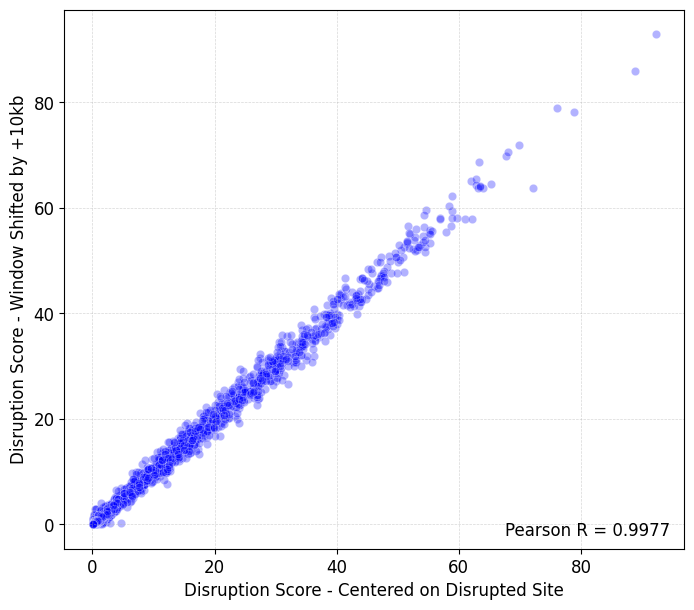

In [5]:
plt.figure(figsize=(8, 7))

plt.scatter(x=df["SCD_no_ave"], y=df["SCD_p10000_ave"], alpha=0.3, edgecolors='w', linewidth=0.5, color='blue')
perm_corr = round(stats.pearsonr(df["SCD_no_ave"], df["SCD_p10000_ave"]).statistic, 4)

plt.xlabel("Disruption Score - Centered on Disrupted Site")
plt.ylabel("Disruption Score - Window Shifted by +10kb")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.text(x=0.71, y=0.05, s=f"Pearson R = {perm_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/disruption_score_centered_vs_shifted.pdf", format="pdf", bbox_inches="tight")

## Correlations between all shifts and no shift

Text(0.5, 0.98, 'Correlations between SCD scores depending on position of disrupted CTCF site')

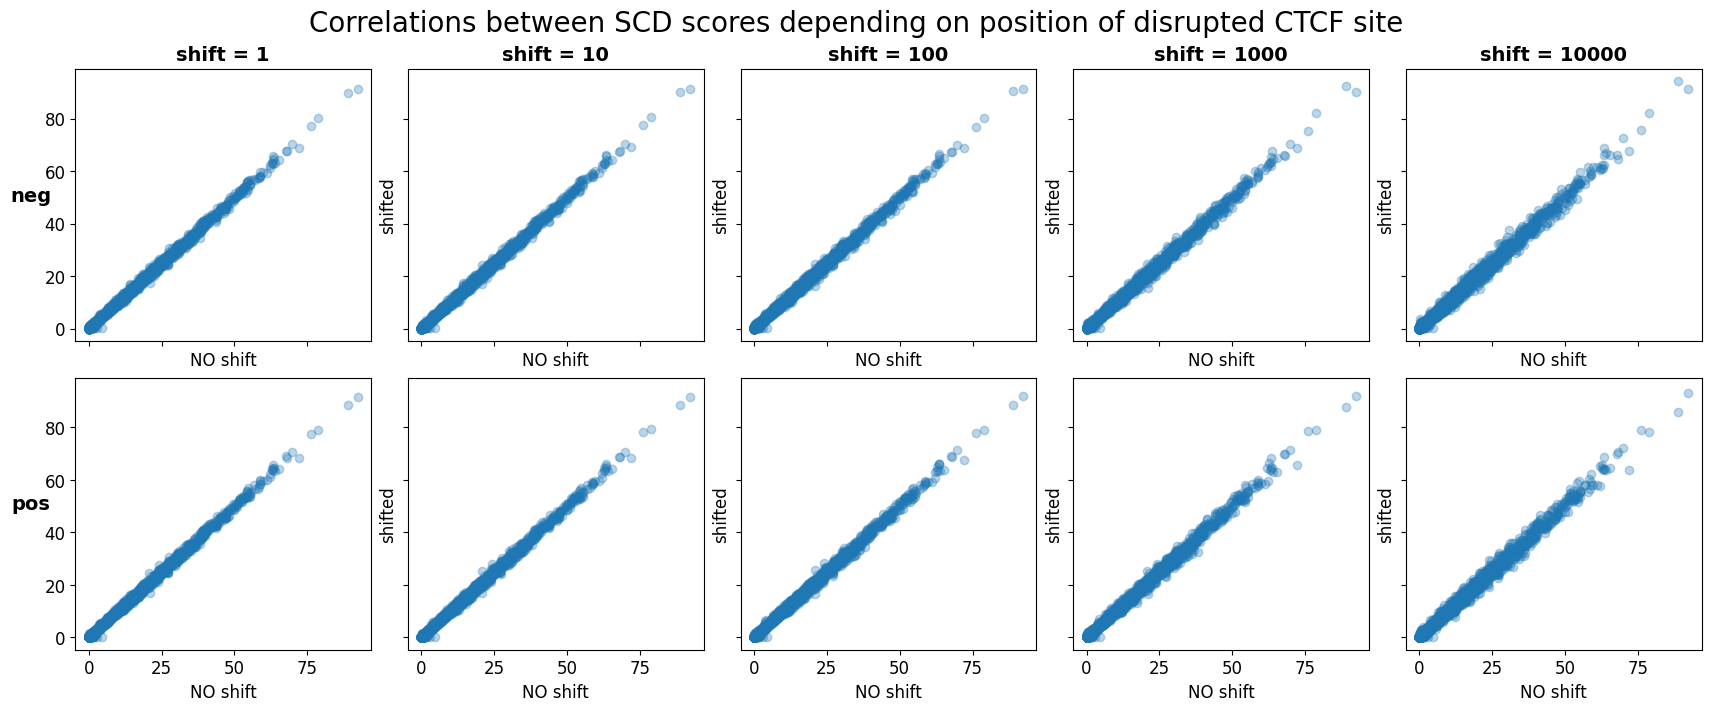

In [6]:
shifts = ["1", "10", "100", "1000", "10000"]
shifts_corr_summary = np.zeros((2, 5))

fig, axs = plt.subplots(2, 5, figsize=(17, 7), sharex=True, sharey=True, layout="constrained")

wt = np.array(df["SCD_no_ave"])

for shift_index in range(len(shifts)):
    
    shift = shifts[shift_index]
    
    neg_shift = np.array(df[f"SCD_n{shift}_ave"])
    pos_shift = np.array(df[f"SCD_p{shift}_ave"])
    
    shifts_corr_summary[0, shift_index] = stats.pearsonr(wt, neg_shift).statistic
    shifts_corr_summary[1, shift_index] = stats.pearsonr(wt, pos_shift).statistic
        
    axs[0, shift_index].scatter(x=wt, y=neg_shift, alpha=0.3)
    axs[1, shift_index].scatter(x=wt, y=pos_shift, alpha=0.3)
    
    axs[0, shift_index].set_xlabel("NO shift")
    axs[0, shift_index].set_ylabel("shifted")
    
    axs[1, shift_index].set_xlabel("NO shift")
    axs[1, shift_index].set_ylabel("shifted")
    
col_names = [f"shift = {i}" for i in shifts]

for ax, col in zip(axs[0], col_names):
    ax.set_title(col, size=14, fontdict=dict(weight="bold"))
    
row_names = ["neg", "pos"]
    
for ax, row in zip(
    axs[:, 0],
    row_names,
):
    ax.set_ylabel(row, rotation=0, fontsize=14, labelpad=10, fontdict=dict(weight="bold"))
    
fig.suptitle("Correlations between SCD scores depending on position of disrupted CTCF site", fontsize=20)

In [7]:
shifts_corr_summary

array([[0.99924518, 0.99917158, 0.99895149, 0.99855971, 0.99764805],
       [0.99926085, 0.99917373, 0.99894103, 0.99850333, 0.99773172]])

In [8]:
shifts_corr_summary.min()

0.9976480520076103